In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

## Data exploration

In [3]:
train_data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.00500666,-0.035144,0.0368472,-0.0575268,-0.00165201,0.0126582
Survived,-0.00500666,1,-0.338481,-0.0772211,-0.0353225,0.0816294,0.257307
Pclass,-0.035144,-0.338481,1,-0.369226,0.0830814,0.0184427,-0.5495
Age,0.0368472,-0.0772211,-0.369226,1,-0.308247,-0.189119,0.0960667
SibSp,-0.0575268,-0.0353225,0.0830814,-0.308247,1,0.414838,0.159651
Parch,-0.00165201,0.0816294,0.0184427,-0.189119,0.414838,1,0.216225
Fare,0.0126582,0.257307,-0.5495,0.0960667,0.159651,0.216225,1


In [6]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [7]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


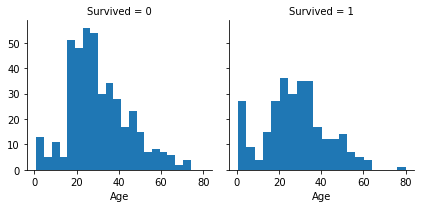

In [8]:
grid = sns.FacetGrid(train_data, col='Survived')
grid.map(plt.hist, 'Age', bins=20)

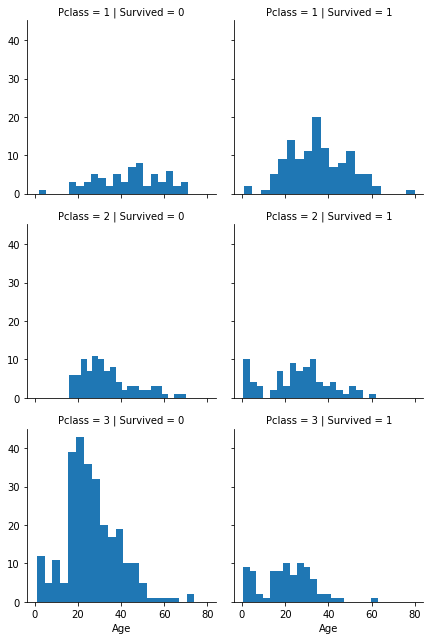

In [9]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

### Data wrangling

In [10]:
train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)

In [11]:
#for dataset in train_data, test_data:
#    dataset['Is_alone'] = np.where(dataset['SibSp'] + dataset['Parch'] > 0, 1, 0)

In [12]:
#train_data[["Is_alone", "Sex", "Survived"]].groupby(['Is_alone', 'Sex'], as_index=False).mean()

,Is_alone,Sex,Survived
0,0,female,0.785714
1,0,male,0.155718
2,1,female,0.712766
3,1,male,0.271084


In [26]:
#train_data = train_data.drop(['SibSp', 'Parch'], axis=1)
#test_data = test_data.drop(['SibSp', 'Parch'], axis=1)

In [13]:
for dataset in train_data, test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [14]:
for dataset in train_data, test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [15]:
train_data = train_data.drop(['PassengerId', 'Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

There are still missing values in age and embarked columns. Also all columns need to be converted to categorical variables for the model.

In [16]:
for dataset in train_data, test_data:
    dataset['Sex'] = np.where(dataset['Sex'] == 'female', 0, 1)
    
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Is_alone,Title
0,0,3,1,22.0,1,0,7.2500,S,1,Mr
1,1,1,0,38.0,1,0,71.2833,C,1,Mrs
2,1,3,0,26.0,0,0,7.9250,S,0,Miss
3,1,1,0,35.0,1,0,53.1000,S,1,Mrs
4,0,3,1,35.0,0,0,8.0500,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,0,Rare
887,1,1,0,19.0,0,0,30.0000,S,0,Miss
888,0,3,0,NaN,1,2,23.4500,S,1,Miss
889,1,1,1,26.0,0,0,30.0000,C,0,Mr


### Guessing age based on sex and pclass
https://www.kaggle.com/startupsci/titanic-data-science-solutions

/Users/arunasumbrasas/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


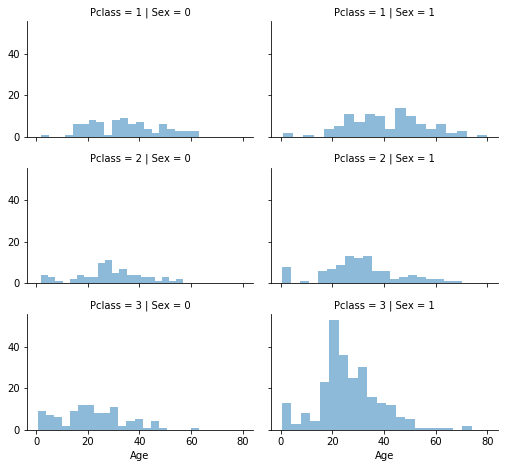

In [17]:
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [18]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [19]:
for dataset in [train_data, test_data]:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

## Turn numeric features into categorical

In [20]:
for dataset in [train_data, test_data]:
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(dataset.Age, bins, labels=group_names)
    dataset.Age = categories

In [21]:
for dataset in [train_data, test_data]:
    dataset.Fare = dataset.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(dataset.Fare, bins, labels=group_names)
    dataset.Fare = categories

In [22]:
for dataset in [train_data, test_data]:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [23]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Is_alone,Title
0,0,3,1,Student,1,0,1_quartile,S,1,Mr
1,1,1,0,Adult,1,0,4_quartile,C,1,Mrs
2,1,3,0,Young Adult,0,0,1_quartile,S,0,Miss
3,1,1,0,Young Adult,1,0,4_quartile,S,1,Mrs
4,0,3,1,Young Adult,0,0,2_quartile,S,0,Mr


## Encoding

In [24]:
from sklearn import preprocessing
def encode_features(train_data, test_data):
    features = ['Age', 'Fare', 'Embarked', 'Title']
    combined = pd.concat([train_data[features], test_data[features]])
    
    for feature in features:
        label_encoder = preprocessing.LabelEncoder()
        label_encoder = label_encoder.fit(combined[feature])
        train_data[feature] = label_encoder.transform(train_data[feature])
        test_data[feature] = label_encoder.transform(test_data[feature])
    return train_data, test_data

train_data, test_data = encode_features(train_data, test_data)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Is_alone,Title
0,0,3,1,4,1,0,0,2,1,2
1,1,1,0,0,1,0,3,0,1,3
2,1,3,0,7,0,0,0,2,0,1
3,1,1,0,7,1,0,3,2,1,3
4,0,3,1,7,0,0,1,2,0,2


## Split training data

In [27]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Is_alone,Title
0,0,3,1,4,0,2,1,2
1,1,1,0,0,3,0,1,3
2,1,3,0,7,0,2,0,1
3,1,1,0,7,3,2,1,3
4,0,3,1,7,1,2,0,2


In [28]:
from sklearn.model_selection import train_test_split

X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

/Users/arunasumbrasas/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7988826815642458


In [32]:
ids = test_data['PassengerId']
predictions = clf.predict(test_data.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
